# Undistort and Transform Perspective Quiz

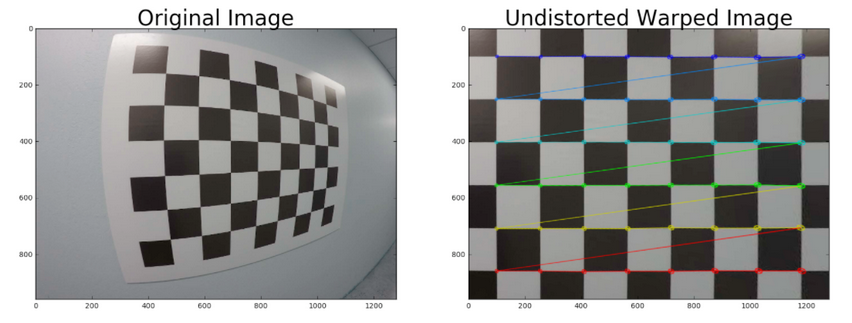

Here's a tricky quiz for you! You have now seen how to find corners, calibrate your camera, undistort an image, and apply a perspective transform. Now it's your chance to perform all these steps on an image. In the last quiz you calibrated the camera, so here I'm giving you the camera matrix, mtx, and the distortion coefficients dist to start with.

Your goal is to generate output like the image shown above. To do that, you need to write a function that takes your distorted image as input and completes the following steps:

- Undistort the image using `cv2.undistort()` with `mtx` and `dist`
- Convert to grayscale
- Find the chessboard corners
- Draw corners
- Define 4 source points (the outer 4 corners detected in the chessboard pattern)
- Define 4 destination points (must be listed in the same order as src points!)
- Use `cv2.getPerspectiveTransform()` to get M, the transform matrix
- use `cv2.warpPerspective()` to apply M and warp your image to a top-down view

**HINT** : Source points are the x and y pixel values of any four corners on your chessboard, you can extract these from the corners array output from `cv2.findChessboardCorners()`. Your destination points are the x and y pixel values of where you want those four corners to be mapped to in the output image.


In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load Distortion Coefficients
Read in the saved camera matrix and distortion coefficients

These are the arrays you calculated using `cv2.calibrateCamera()`

In [2]:
dist_pickle = pickle.load( open( "wide_dist_pickle_2.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

## Read in an image

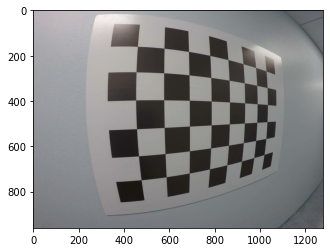

In [3]:
img = cv2.imread('test_images/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y
plt.imshow(img)

## Corners Unwarp

Pass in your image into this function
Write code to do the following steps
1. Undistort using mtx and dist
2. Convert to grayscale
3. Find the chessboard corners
4. If corners found: 
    1. draw corners
    2. define 4 source points `src = np.float32([[,],[,],[,],[,]])`
     Note: you could pick any four of the detected corners 
      as long as those four corners define a rectangle
     One especially smart way to do this would be to use four well-chosen
      corners that were automatically detected during the undistortion steps
     We recommend using the automatic detection of corners in your code
    3. define 4 destination points `dst = np.float32([[,],[,],[,],[,]])`
    4. use `cv2.getPerspectiveTransform()` to get M, the transform matrix
    5. use `cv2.warpPerspective()` to warp your image to a top-down view
delete the next two lines

In [6]:
def cal_undistort(img, mtx, dist):
#     # Use cv2.calibrateCamera() and cv2.undistort()
#     img_size = (img.shape[1], img.shape[0])

#     # Do camera calibration given object points and image points
#     ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

def find_corners (img, nx, ny):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*8,3), np.float32)
    objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # print ('Corners found %s', corners)
    # print ('Corners found %s', [corners[0, 0], corners[1, 0], corners[8, 0], corners[9, 0]])
    # print ('Corners shap %s', corners.shap)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
    
    return corners

def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    img_size = (img.shape[1], img.shape[0])
    
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort_img = cal_undistort (img, mtx, dist)
    
    # 2) Convert to grayscale
    # 3) Find the chessboard corners
    corners = find_corners (undistort_img, nx, ny)
    
    # 4) If corners found: 
    #         a) draw corners
    #         b) define 4 source points src = np.float32([[,],[,],[,],[,]])
    
    src = np.float32([corners[0, 0], corners[nx - 1, 0], corners[nx*(ny-1), 0], corners[nx*ny-1, 0]])
    # print('Src shape: %s', src.shape)
    # print('Src: %s', src)
    
    #              Note: you could pick any four of the detected corners 
    #               as long as those four corners define a rectangle
    #              One especially smart way to do this would be to use four well-chosen
    #               corners that were automatically detected during the undistortion steps
    #              We recommend using the automatic detection of corners in your code
    #         c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
#     [[ 462.55078  161.32762]
#  [1030.1245   269.8507 ]
#  [ 478.81427  748.9179 ]
#  [1021.08344  637.51074]]
    x0, y0, xl, yl = 50, 50, 120, 120
    dst = np.float32([[x0, y0],[x0+(nx-1)*xl, y0],[x0, y0+(ny-1)*yl],[x0+(nx-1)*xl, y0+(ny-1)*yl]])
    # print('dst: %s', dst)
    
    #         d) use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    #         e) use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(undistort_img, M, img_size, flags=cv2.INTER_LINEAR)
    
    # delete the next two lines
#     M = None
#     warped = np.copy(img) 
    return warped, M

## Call and show outcome

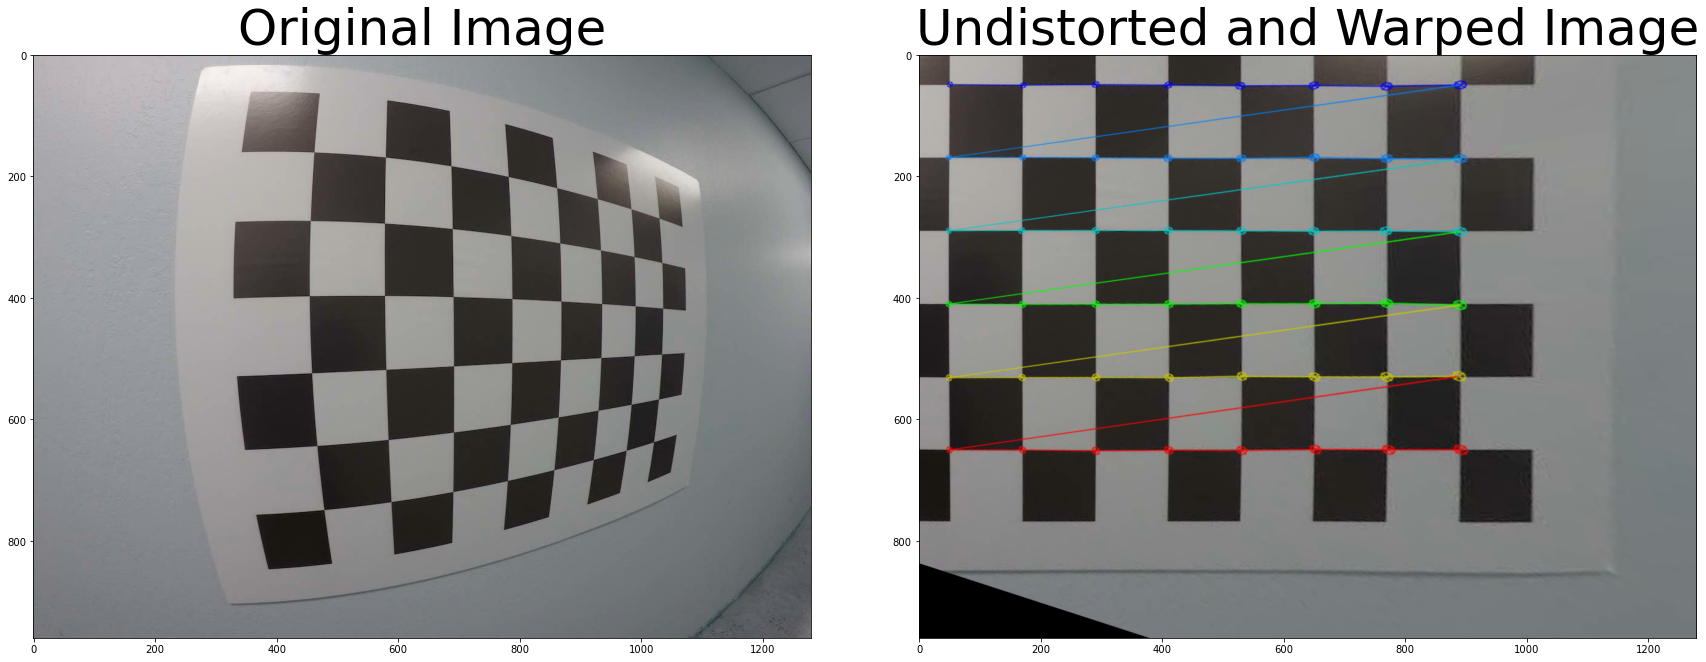

In [7]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

---

## Model Answer

In [4]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp_md(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    warped_img, M = None, None
    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped_img = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped_img, M

## Call and show outcome

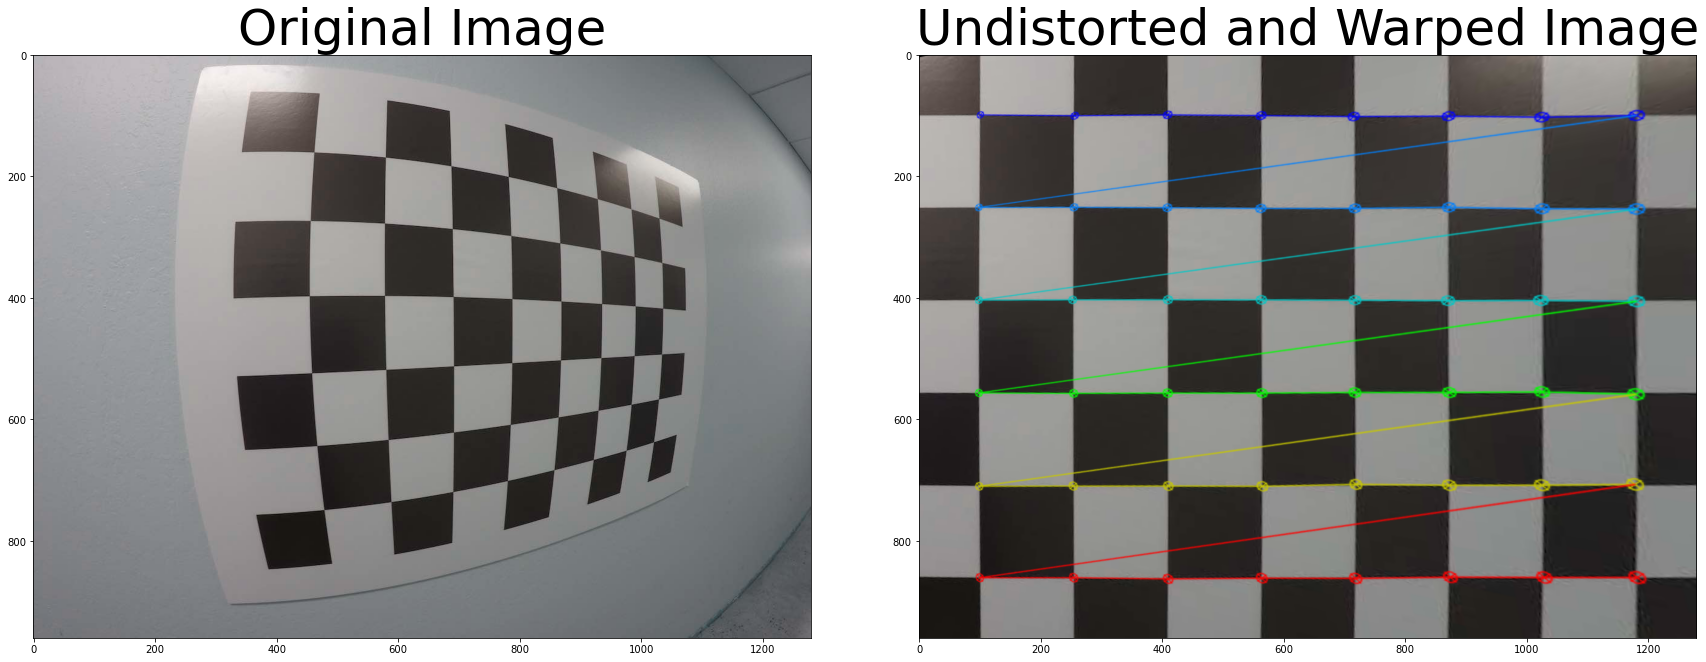

In [5]:
undistort_img, perspective_M = corners_unwarp_md(img, nx, ny, mtx, dist)

f, (ax3, ax4) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax3.imshow(img)
ax3.set_title('Original Image', fontsize=50)
ax4.imshow(undistort_img)
ax4.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)